In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import random as rnd



In [51]:
train = pd.read_csv(r'C:\Users\saedw\OneDrive\Desktop\CECS 456 Machine Learning\Data\train.csv')
test = pd.read_csv(r'C:\Users\saedw\OneDrive\Desktop\CECS 456 Machine Learning\Data\test.csv')

combine = [train, test]

combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [52]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [54]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [55]:
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [56]:
train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

# sex shows sig pred of survival - class and sex even greater

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [57]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [58]:
train[['Pclass', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

In [59]:
train[['Sex', 'Embarked','PassengerId']].groupby(['Embarked', 'Sex'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

In [60]:
train[['Sex', 'Embarked','Survived']].groupby(['Sex', 'Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       S         0.174603
       Q         0.073171

<AxesSubplot:title={'center':'Survival rate by Number of Siblings and Spouses in ship'}, xlabel='SibSp', ylabel='Survived'>

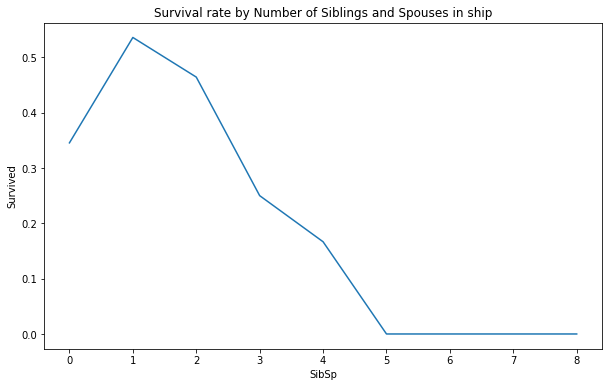

In [61]:
sib_sp = train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Survival rate by Number of Siblings and Spouses in ship")
sns.lineplot(data=sib_sp, x='SibSp', y='Survived')

<AxesSubplot:title={'center':'Survival rate by Number of Parents and Children in ship'}, xlabel='Parch', ylabel='Survived'>

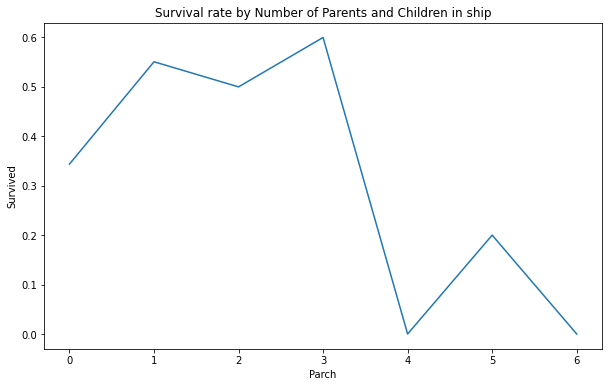

In [62]:
par_ch = train[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Survival rate by Number of Parents and Children in ship")
sns.lineplot(data=par_ch, x='Parch', y='Survived')

<AxesSubplot:title={'center':'Survival rate by Family Size in ship'}, xlabel='FamilySize', ylabel='Survived'>

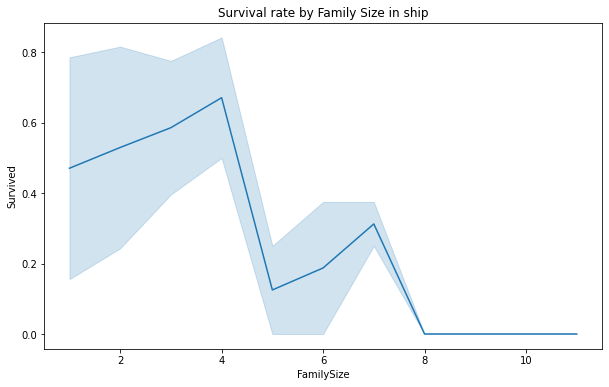

In [63]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

family_size = train[['FamilySize','Sex', 'Survived']].groupby(['Sex','FamilySize'], as_index=True).mean()

plt.figure(figsize=(10,6))
plt.title("Survival rate by Family Size in ship")
sns.lineplot(data=family_size, x='FamilySize', y='Survived')

<AxesSubplot:title={'center':'Survival rate by Family Size in ship'}, xlabel='FamilySize', ylabel='Survived'>

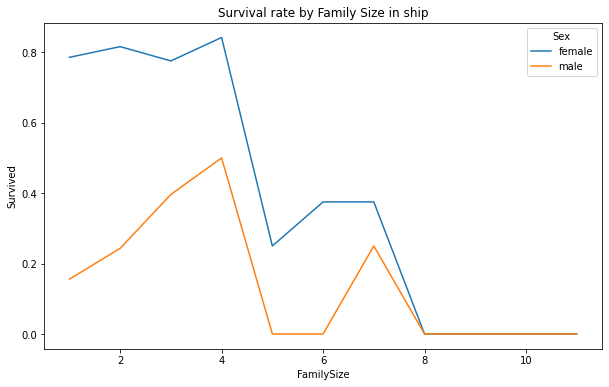

In [64]:
plt.figure(figsize=(10,6))
plt.title("Survival rate by Family Size in ship")
sns.lineplot(data=family_size, x='FamilySize', y='Survived', hue='Sex')

In [65]:
train[['FamilySize', 'PassengerId']].groupby(['FamilySize'], as_index=True).count()

,PassengerId
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [66]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [67]:
train[['IsAlone','Sex', 'Survived']].groupby(['Sex','IsAlone'], as_index=True).mean()

Survived
Sex    IsAlone          
female 0        0.712766
       1        0.785714
male   0        0.271084
       1        0.155718

In [68]:
train = train.drop(['Parch', 'SibSp','IsAlone'], axis=1)
test = test.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [69]:
for dataset in combine:
    dataset['CategoricalAge'] = pd.qcut(train['Age'], 5)

categorical_age = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()
print(categorical_age)

                Survived
CategoricalAge          
(0.419, 19.0]   0.481707
(19.0, 25.0]    0.328467
(25.0, 31.8]    0.393701
(31.8, 41.0]    0.437500
(41.0, 80.0]    0.373239


In [70]:
for dataset in combine:
    dataset['CategoricalAge'] = pd.qcut(train['Age'], 15)

train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()

,Survived
CategoricalAge,
"(0.419, 7.0]",0.680000
"(7.0, 16.0]",0.420000
"(16.0, 19.0]",0.375000
"(19.0, 21.0]",0.200000
"(21.0, 23.0]",0.380952
"(23.0, 25.0]",0.381818
"(25.0, 27.0]",0.472222
"(27.0, 29.0]",0.319149
"(29.0, 31.8]",0.409091


<AxesSubplot:title={'center':'Survival rate by Age (in categories)'}, xlabel='Age Categories', ylabel='Survival rate'>

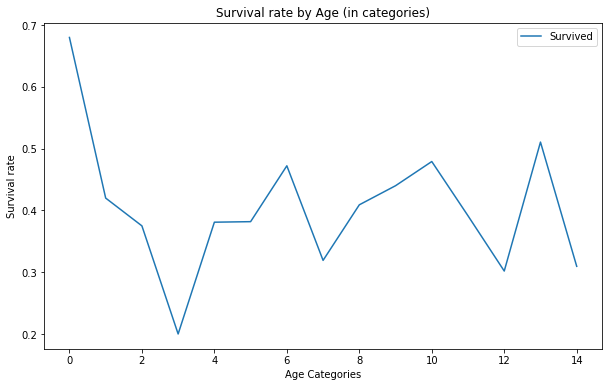

In [71]:
categorical_age = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

plt.figure(figsize=(10,6))
plt.title("Survival rate by Age (in categories)")
plt.xlabel("Age Categories")
plt.ylabel("Survival rate")
sns.lineplot(data=categorical_age)

In [72]:
for dataset in combine:
    dataset['IsKid'] = 0
    dataset.loc[dataset['Age'] <= 7, 'IsKid'] = 1

print(train[['IsKid', 'Survived']].groupby(['IsKid'], as_index=False).mean())

   IsKid  Survived
0      0  0.366231
1      1  0.680000


In [73]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,"(21.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,"(37.0, 41.0]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,"(25.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,"(34.0, 37.0]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,"(34.0, 37.0]",0


In [74]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [75]:
for dataset in combine:
    dataset['HasCabin'] = 1
    dataset.loc[dataset['Cabin'].isnull(), 'HasCabin'] = 0

train[['HasCabin', 'Survived']].groupby(['HasCabin'], as_index=True).mean()

,Survived
HasCabin,
0,0.299854
1,0.666667


In [76]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,"(21.0, 23.0]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,"(37.0, 41.0]",0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,"(25.0, 27.0]",0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,"(34.0, 37.0]",0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,"(34.0, 37.0]",0,0


<AxesSubplot:title={'center':'Fare paid by class'}, xlabel='Pclass', ylabel='Fare'>

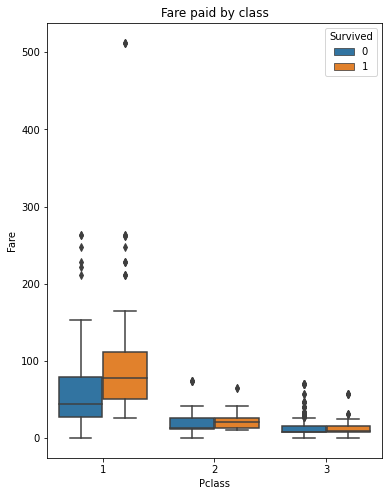

In [77]:
plt.figure(figsize=(6,8))
plt.title("Fare paid by class")
sns.boxplot(data=train, x='Pclass', y='Fare', hue='Survived')

In [78]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,2,"(21.0, 23.0]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,2,"(37.0, 41.0]",0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,"(25.0, 27.0]",0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,2,"(34.0, 37.0]",0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,1,"(34.0, 37.0]",0,0


In [79]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [80]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=True).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [81]:
train[['Title', 'Pclass', 'Survived']].groupby(['Title', 'Pclass'], as_index=True).mean()

Survived
Title  Pclass          
Master 1       1.000000
       2       1.000000
       3       0.392857
Miss   1       0.958333
       2       0.942857
       3       0.500000
Mr     1       0.345794
       2       0.087912
       3       0.112853
Mrs    1       0.976744
       2       0.902439
       3       0.500000
Rare   1       0.533333
       2       0.000000

In [82]:
pd.crosstab(train['Title'], train['CategoricalAge'])

CategoricalAge,"(0.419, 7.0]","(7.0, 16.0]","(16.0, 19.0]","(19.0, 21.0]","(21.0, 23.0]","(23.0, 25.0]","(25.0, 27.0]","(27.0, 29.0]","(29.0, 31.8]","(31.8, 34.0]","(34.0, 37.0]","(37.0, 41.0]","(41.0, 47.0]","(47.0, 54.0]","(54.0, 80.0]"
Title,,,,,,,,,,,,,,,
Master,26,10,0,0,0,0,0,0,0,0,0,0,0,0,0
Miss,24,23,19,9,13,11,6,4,13,4,7,7,2,4,3
Mr,0,15,38,31,24,34,24,32,25,35,32,23,34,23,28
Mrs,0,2,7,0,4,10,5,10,6,9,9,14,14,12,7
Rare,0,0,0,0,1,0,1,1,0,2,0,2,3,8,4


In [83]:
train[['Title', 'PassengerId','Age']].groupby(['Title'], as_index=True).count()

,PassengerId,Age
Title,,
Master,40,36
Miss,185,149
Mr,517,398
Mrs,126,109
Rare,23,22


In [84]:
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,C,3,NaN,0,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,S,11,NaN,0,0,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,S,5,NaN,0,0,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,C,3,NaN,0,0,Master


In [85]:
for dataset in combine:
    masters_id = dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Master')]['PassengerId'].tolist()

    for i in masters_id:
        if rnd.random()  <= 0.7:
            dataset.loc[dataset['PassengerId'] == i, 'IsKid'] = 1

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,C,3,NaN,0,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,S,11,NaN,0,0,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,S,5,NaN,0,0,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,C,3,NaN,1,0,Master


In [86]:
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,Q,1,NaN,0,0,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,Q,1,NaN,0,0,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,Q,1,NaN,0,0,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,Q,1,NaN,0,0,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,Q,2,NaN,0,0,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,C,3,NaN,0,1,Miss
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,S,11,NaN,0,0,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,Q,1,NaN,0,0,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,S,5,NaN,0,0,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,S,1,NaN,0,0,Miss


In [87]:
for dataset in combine:
    misses_id = dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Miss')]['PassengerId'].tolist()

    for i in misses_id:
        if rnd.random()  <= 0.16:
            dataset.loc[dataset['PassengerId'] == i, 'IsKid'] = 1

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,Q,1,NaN,0,0,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,Q,1,NaN,0,0,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,Q,1,NaN,0,0,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,Q,1,NaN,0,0,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,Q,2,NaN,1,0,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,C,3,NaN,0,1,Miss
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,S,11,NaN,0,0,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,Q,1,NaN,1,0,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,S,5,NaN,1,0,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,S,1,NaN,1,0,Miss


In [88]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,S,2,"(21.0, 23.0]",0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,C,2,"(37.0, 41.0]",0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,S,1,"(25.0, 27.0]",0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,S,2,"(34.0, 37.0]",0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,S,1,"(34.0, 37.0]",0,0,Mr


In [89]:
freq_port = train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,S,2,"(21.0, 23.0]",0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,C,2,"(37.0, 41.0]",0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,S,1,"(25.0, 27.0]",0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,S,2,"(34.0, 37.0]",0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,S,1,"(34.0, 37.0]",0,0,Mr


In [90]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,0,2,"(21.0, 23.0]",0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,2,"(37.0, 41.0]",0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,1,"(25.0, 27.0]",0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,2,"(34.0, 37.0]",0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,1,"(34.0, 37.0]",0,0,Mr


In [91]:
train = train.drop(['Name', 'PassengerId', 'Age', 'CategoricalAge', 'Title', 'Embarked', 'HasCabin', 'FamilySize'], axis=1)
test = test.drop(['Name', 'Age', 'CategoricalAge', 'Title', 'Embarked', 'HasCabin', 'FamilySize'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 4), (418, 4))

In [92]:
train.head()

,Survived,Pclass,Sex,IsKid
0,0,3,0,0
1,1,1,1,0
2,1,3,1,0
3,1,1,1,0
4,0,3,0,0


In [93]:
test.head()

,PassengerId,Pclass,Sex,IsKid
0,892,3,0,0
1,893,3,1,0
2,894,2,0,0
3,895,3,0,0
4,896,3,1,0


In [94]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 3), (891,), (418, 3))

In [112]:
# Machine learning Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [98]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [99]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.527535
2,IsKid,1.451990
0,Pclass,-0.997653


In [100]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.25

In [101]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

70.59

In [102]:
# Gaussian Naive Bayes

gaussian = GaussianProcessClassifier()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.58

In [103]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [104]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

In [105]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

80.7

In [106]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

80.7

In [113]:
# XG Boost

classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, Y_train)
Y_pred = classifier_xgb.predict(X_test)
classifier_xgb.score(X_train, Y_train)
acc_classifier_xgb = round(classifier_xgb.score(X_train, Y_train) * 100, 2)
acc_classifier_xgb


80.58

In [115]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'XG Boost',
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_classifier_xgb,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,80.70
8,Decision Tree,80.70
4,Naive Bayes,80.58
5,XG Boost,80.58
0,Support Vector Machines,80.25
2,Logistic Regression,79.80
7,Linear SVC,79.80
6,Stochastic Gradient Decent,79.46
1,KNN,70.59
